<a href="https://colab.research.google.com/github/Vishruti1309/Stock-price-detection/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import yfinance  as yf

In [4]:
start = '2015-01-01'
end = '2025-12-21'
stock = 'GOOG'
data = yf.download(stock,start, end)


/tmp/ipython-input-558280020.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,25.990791,26.310719,25.955630,26.198793,28951268
1,2015-01-05,25.448997,25.967021,25.408884,25.914029,41196796
2,2015-01-06,24.859165,25.563153,24.814100,25.504961,57998800
3,2015-01-07,24.816574,25.120850,24.744764,25.108766,41301082
4,2015-01-08,24.894823,24.934442,24.316380,24.662554,67071641
...,...,...,...,...,...,...
2729,2025-11-07,279.700012,284.500000,275.739990,284.209991,21991100
2730,2025-11-10,290.589996,291.459991,283.540009,285.265015,19508200
2731,2025-11-11,291.739990,292.339996,287.880005,288.200012,14156700


In [7]:
ma_100_days = data.Close.rolling(100).mean()

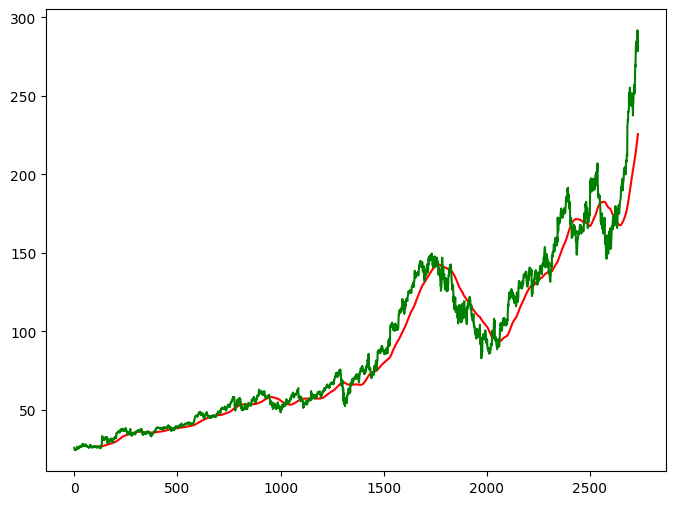

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days , 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

Green line = Actual Closing price
Red line = moving average with 100 days
Blue line = moving average of the 200 days


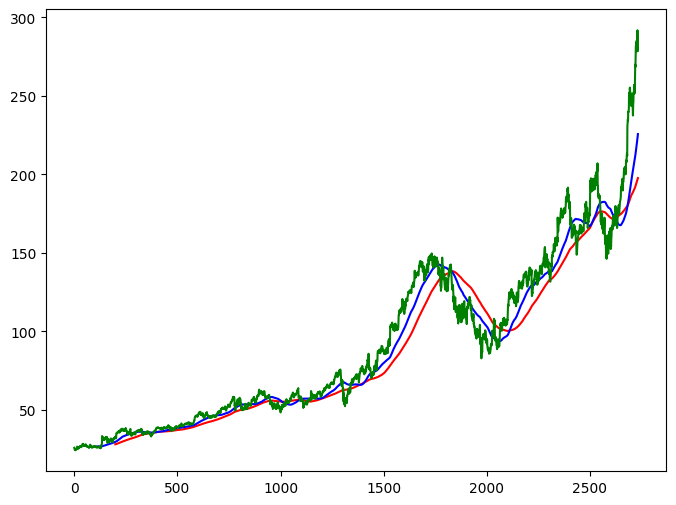

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days, 'r')
plt.plot(ma_100_days , 'b')
plt.plot(data.Close , 'g')
plt.show()

In [11]:
data.dropna(inplace = True)

80% of Training data and 20% of the tesing data

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)* 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [13]:
data_train.shape[0]

2187

In [14]:
data_test.shape[0]

547

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x= []
y =[]
for i in range(100 , data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i ,0])

In [18]:
x,y = np.array(x) , np.array(y)

<!-- Creating a model  -->

In [19]:
from  keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences= True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , activation = 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [22]:
model.fit(x,y , epochs = 50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 242ms/step - loss: 0.0998
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - loss: 0.0092
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - loss: 0.0081
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - loss: 0.0065
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0069
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - loss: 0.0056
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - loss: 0.0059
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - loss: 0.0051
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0062
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - loss: 0.0050
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - loss: 0.0046
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - loss: 0.0051
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - loss: 0.0039
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - loss: 0.0052
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days , data_test], ignore_index=True)

In [29]:
data_test_scale  = scaler.fit_transform(data_test)

In [30]:
x= []
y =[]
for i in range(100 , data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i ,0])
x, y = np.array(x)   , np.array(y)

In [31]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


In [36]:
scale = 1/scaler.scale_

In [37]:
y_predict = y_predict*scale

In [38]:
y = y * scale

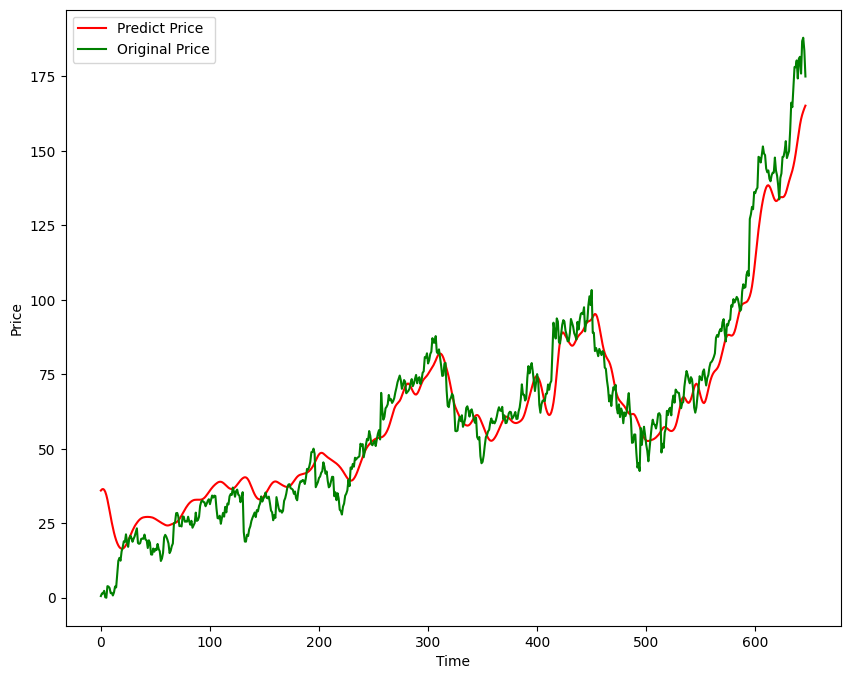

In [41]:
plt.figure(figsize=(10,8))
plt.plot(y_predict , 'r' , label = 'Predict Price')
plt.plot (y , 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [42]:
model.save('Stock Predictions Model.keras')

In [45]:
from google.colab import drive
drive.mount('/content/drive')

!cp "Stock Predictions Model.keras" "/content/drive/MyDrive/"


Mounted at /content/drive
